# Tarea 3. Glove Embedding y Redes Neuronales

Aprendizaje de Máquina I, 2020

Oscar Esaú Peralta Rosales

Maestría en Ciencias con Especialidad en Computación


In [0]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt

# Glove Embedding

Ejercicio 1. Usar el embedding Glove y mostrar lo siguiente:

1. Ejemplos de correlación entre palabras esperadas similares y no similares.
2. Ejemplos de búsquedas de K-vecinos más cercanos a palabras (mostrar las k palabras más similares).
3. Ejemplos de reglas de 3 entre palabras, como el siguiente: hijo es a padre como hija es a: (mostrar los k resultados más cercanos).

Comente sus resultados.

In [8]:
fglove_zip = 'glove.6B.zip'
fglove = 'glove.6B.100d.txt'

# Descargando Glove si no existe solo para linux o en colab

files = !ls
files = files[0].split()

if fglove not in files:
    if fglove_zip not in files:
        print('Downloading glove')
        glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
        !wget $glove_url
    print("Descomprimiendo")
    !unzip $fglove_zip

--2020-03-20 13:42:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-20 13:42:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-20 13:42:12--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

Construyendo diccionario

In [9]:
glovePath = './'

# diccionario
embeddingsDir = {}
f = open(os.path.join(glovePath, fglove))
for line in f:
    # línea completa
    values = line.split()
    # primer elemento: palabra
    word   = values[0]
    # 100 coeficientes
    coefs  = np.asarray(values[1:], dtype='float32')
    embeddingsDir[word] = coefs
f.close()

print('Se encontraron {} pares palabra-vector.'.format(len(embeddingsDir)))

Se encontraron 400000 pares palabra-vector.


## Ejemplos de correlación entre palabras esperadas similares y no similares.

<Figure size 1080x1080 with 0 Axes>

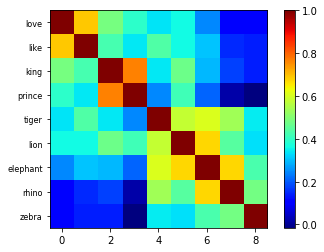

In [11]:
def showCorr(Corr, labels, cmap='jet'):
    plt.figure(figsize=(15,15))
    fig, ax1 = plt.subplots()
    cax=plt.imshow(Corr, cmap=cmap)
    ax1.set_yticklabels(['']+labels,fontsize=8)
    fig.colorbar(cax)
    plt.show()

names=['love', 'like', 'king', 'prince', 'tiger', 'lion', 'elephant','rhino','zebra']
embdd = np.array([embeddingsDir[name] for name in names])
Corr= np.corrcoef(embdd)

showCorr(Corr=Corr, labels=names, cmap='jet')

**Global Vectors for Word Representation**

GloVe es un modelo logarítmico-bilineal con un objetivo de mínimos cuadrados ponderados. 

El modelo se basa en una idea bastante simple de que las proporciones de probabilidades de coincidencia palabra-palabra tienen el potencial de codificar alguna forma de significado que puede codificarse como diferencias de vectores. Por lo tanto, el objetivo del entrenamiento es aprender vectores de palabras de modo que su producto de puntos sea igual al logaritmo de la probabilidad de coincidencia de las palabras. 

Como el logaritmo de una razón es igual a la diferencia de logaritmos, este objetivo asocia las razones de las probabilidades de co-ocurrencia con las diferencias de vectores en la palabra espacio vectorial.

https://medium.com/sciforce/word-vectors-in-natural-language-processing-global-vectors-glove-51339db89639


En la matriz de correlación de arriba se observa las fuertes relaciones entre diversas palabras

Claramente se observan dos grupos grandes de palabras relacionadas:

```
'love', 'like', 'king', 'prince',
```

el primer grupo la relaciones más fuertes son entre amor y gustar y entre rey y principe.

Y el segúndo grupo

```
'tiger', 'lion', 'elephant','rhino','zebra'
```

dónde las relaciones elefante y leon como rinoceronte y elefante son las más fuertes, algo que es de suponerse puesto que dichos animales viven en la misma zona.

Además vemos que palabra león es la unión de dichos grupos.


## Ejemplos de búsquedas de K-vecinos más cercanos a palabras

In [0]:
def get_k_neighbors(v1, embeddingsDir, k=10):
    """ Return the closest k neighbors for a embedding """
    d = lambda _v1, _v2: np.linalg.norm(_v1 - _v2)
    distances = [(d(v1,v2), wi) for wi, v2 in embeddingsDir.items()]
    distances.sort()
    return distances[:k]

In [16]:
get_k_neighbors(embeddingsDir['prince'], embeddingsDir, k=10)

[(0.0, 'prince'),
 (4.092166, 'king'),
 (4.2225327, 'nephew'),
 (4.392355, 'cousin'),
 (4.4694467, 'brother'),
 (4.4983993, 'son'),
 (4.5588813, 'princess'),
 (4.6474814, 'uncle'),
 (4.833654, 'duke'),
 (4.859281, 'albert')]

In [17]:
get_k_neighbors(embeddingsDir['dog'], embeddingsDir, k=10)

[(0.0, 'dog'),
 (2.6811306, 'cat'),
 (3.2425272, 'dogs'),
 (3.9500551, 'puppy'),
 (3.9634414, 'pet'),
 (4.3288527, 'horse'),
 (4.4629855, 'pig'),
 (4.518958, 'cats'),
 (4.5231004, 'animal'),
 (4.547051, 'rabbit')]

In [15]:
get_k_neighbors(embeddingsDir['laptop'], embeddingsDir, k=10)

[(0.0, 'laptop'),
 (2.947082, 'laptops'),
 (4.044167, 'computers'),
 (4.091052, 'cellphones'),
 (4.105144, 'portable'),
 (4.214751, 'phones'),
 (4.275713, 'cellphone'),
 (4.310582, 'notebooks'),
 (4.4371734, 'pda'),
 (4.446697, 'handheld')]

In [16]:
get_k_neighbors(embeddingsDir['sea'], embeddingsDir, k=10)

[(0.0, 'sea'),
 (3.451015, 'ocean'),
 (3.7207115, 'waters'),
 (4.1783104, 'seas'),
 (4.4711404, 'mediterranean'),
 (4.726858, 'atlantic'),
 (4.7771955, 'arctic'),
 (4.7795863, 'coastal'),
 (4.7934036, 'coast'),
 (4.9251547, 'ship')]

Los ejemplos anteriores imprimen los 10 vecinos más cercanos, se observa bastante claro que las palabras cuyas distancias son las más próximas a una en específico estan bastante relacionadas y se usan dentro del mismo contexto.

## Ejemplos de reglas de analogía entre palabras

In [0]:
def get_relations(y1, y2, y3, embeddingsDir, k=1):
    """ Returns the word that complete the relacion y1 -> y2 as y3 -> y4
        y1​ − y3 ​≈ y2 ​− y4​
    """
    y4 = embeddingsDir[y3] - embeddingsDir[y1] + embeddingsDir[y2]
    return get_k_neighbors(y4, embeddingsDir, k=k)

In [25]:
get_relations('king', 'queen', 'prince', embeddingsDir)

[(3.9443252, 'princess')]

In [26]:
get_relations('father', 'mother', 'son', embeddingsDir)

[(1.8504221, 'daughter')]

In [27]:
get_relations('king', 'queen', 'duke', embeddingsDir)

[(4.143696, 'duchess')]

In [28]:
get_relations('dog', 'cat', 'dogs', embeddingsDir)

[(2.6258438, 'cats')]

In [29]:
get_relations('fly', 'airplane', 'walk', embeddingsDir)

[(4.358625, 'elevator')]

Encontrar analogías vs encontrar palabras relacionadas es un poco más dificil.

Los casos que funcionan son bastante escasos a pesar de buscar algunos bastante evidentes el resultado no es el esperado:

In [34]:
get_relations('day', 'light', 'night', embeddingsDir, k=10)

[(3.3739052, 'light'),
 (4.6983733, 'lights'),
 (4.8259287, 'dark'),
 (4.894867, 'sky'),
 (5.067634, 'bright'),
 (5.257024, 'night'),
 (5.357919, 'sight'),
 (5.417894, 'glow'),
 (5.5214524, 'flames'),
 (5.531312, 'fire')]

En este caso la palabra buscada *dark* para acompletar la analogía aparece hasta la 3ra posición.

# Redes Neuronales


Ejercicio 2. 

1. Implementar una red neuronal con dos ramas de de procesamiento:
    - Rama 1. Capas densas que producen un vector de dimensión d ≥ 10.
    - Rama 2. Capas convolucionales que producen un vector de dimension d ≥ 10.
     
 Luego, concatenar las salidas de ambas ramas y procesar por capa(s) densa(s) para producir un vector de dimensión 10. Este vector guardará la probabilidad de que la imagen de entrada pertenezca a una de las respectivas diez clases.

2. Compare el desempeño de esta red mixta (dos ramas), contra una red sólo con capas densas, y contra otra red sólo con capas convolucionales, de similar complejidad. Grafique o elabore una tabla indicando la arquitectura de sus redes. Usar como datos de prueba los conjuntos Digit-MNIST y FASHION-MNIST disponibles en Keras.

3. Elabore métricas de desempeño para sus 3 redes, y discuta sus resultados.

Bibliotecas necesarias

In [36]:
import keras

from keras import backend as bk
from keras import models

from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.datasets import mnist, fashion_mnist

from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score

import seaborn as sns 

Using TensorFlow backend.


Función hacer reset de los pesos de un model

In [0]:
# Resetea los pesos del modelo 
def reset_weights(model):
    session = bk.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

## Lectura y preprocesamiento de los datos

Dataset MNIST

In [42]:
(train_mnist, train_labels_mnist), (test_mnist, test_labels_mnist) = mnist.load_data()

print('Dimensiones del conjunto de entrenamiento: ', train_mnist.shape)
print('Dimensiones del conjunto de evaluación: ', train_mnist.shape)

num_data, nrows, ncols = train_mnist.shape

11493376/11490434 [==============================] - 1s 0us/step
Dimensiones del conjunto de entrenamiento:  (60000, 28, 28)
Dimensiones del conjunto de evaluación:  (60000, 28, 28)


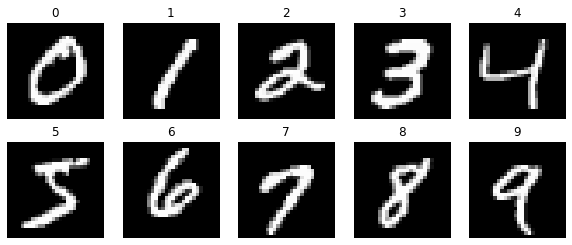

In [43]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_labels_mnist).index(i)
    plt.imshow(train_mnist[idx], 'gray')
    plt.title(train_labels_mnist[idx])
    plt.axis('off')

plt.show()

Dataset Fashion MNIST

In [44]:
(train_fashion_mnist, train_labels_fashion_mnist), (test_fashion_mnist, test_labels_fashion_mnist) = fashion_mnist.load_data()

print('Dimensiones del conjunto de entrenamiento: ', train_fashion_mnist.shape)
print('Dimensiones del conjunto de evaluación: ', train_fashion_mnist.shape)

num_data, nrows, ncols = train_fashion_mnist.shape

Dimensiones del conjunto de entrenamiento:  (60000, 28, 28)
Dimensiones del conjunto de evaluación:  (60000, 28, 28)


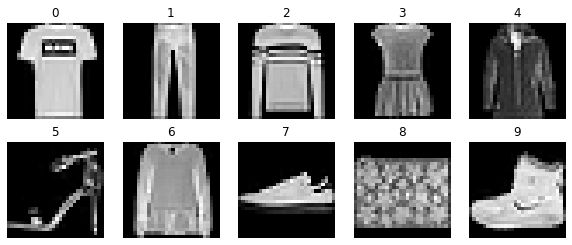

In [45]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_labels_fashion_mnist).index(i)
    plt.imshow(train_fashion_mnist[idx], 'gray')
    plt.title(train_labels_fashion_mnist[idx])
    plt.axis('off')

plt.show()

Transformamos cada imágenes a un solo vector en vez de matriz

In [46]:
train_mnist = train_mnist.reshape((60000, 28, 28, 1))
train_mnist = train_mnist.astype('float32') / 255

test_mnist = test_mnist.reshape((10000, 28, 28, 1))
test_mnist = test_mnist.astype('float32') / 255

numIm, width, heigh, deep  = train_mnist.shape
numIm, width, heigh, deep

(60000, 28, 28, 1)

In [47]:
train_fashion_mnist = train_fashion_mnist.reshape((60000, 28, 28, 1))
train_fashion_mnist = train_fashion_mnist.astype('float32') / 255

test_fashion_mnist = test_fashion_mnist.reshape((10000, 28, 28, 1))
test_fashion_mnist = test_fashion_mnist.astype('float32') / 255

numIm, width, heigh, deep  = train_fashion_mnist.shape
numIm, width, heigh, deep

(60000, 28, 28, 1)

Codificamos la salida a una representación posicional sobre un vector

In [48]:
train_labels_mnist = to_categorical(train_labels_mnist)
test_labels_mnist  = to_categorical(test_labels_mnist)
test_labels_mnist[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [49]:
train_labels_fashion_mnist = to_categorical(train_labels_fashion_mnist)
test_labels_fashion_mnist  = to_categorical(test_labels_fashion_mnist)
test_labels_fashion_mnist[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Red neuronal con dos ramas de de procesamiento

Capa de entrada: Las imágenes son de 28x28, con un canal de color 

In [50]:
input1 = Input(shape=(28, 28, 1))

**Primera Rama**

La primer rama es de capas densas.

Primero se realiza un flatten sobre los datos y luego se pasa a dos capas densas de tamaño 512 y 256 cada una.

In [51]:
# Creamos cada vector como imagen
r1_x = Flatten()(input1)
r1_x = Dense(units=512, activation='relu')(r1_x)
r1_x = Dense(units=256, activation='relu')(r1_x)

**Segunda Rama**

La segunda rama es de capas convolucionales. Se aplican 32, 64 y 64 filtros respectivamente en cada una de las capas. En dónde se recolectan 



In [52]:
# Extracción de características + Pooling para agrupar y resaltar características
r2_x = Conv2D(filters=32, kernel_size =(3, 3), activation  ='relu')(input1)
r2_x = MaxPooling2D(pool_size=(2, 2))(r2_x)
r2_x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(r2_x)
r2_x = MaxPooling2D(pool_size=(2, 2))(r2_x)
r2_x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(r2_x)

# Flatten al output para dar como entrada a las capas densas
r2_x = Flatten()(r2_x)

Concatenación de las ramas

In [0]:
x12 = keras.layers.Concatenate()([r1_x, r2_x])
x12 = Dense(128, activation='relu')(x12)
y = Dense(10, activation='softmax')(x12)

Compilación el modelo

In [54]:
# Modelo para MNIST
model1 = Model(inputs=[input1], 
                 outputs=[y], 
                 name='multiOut')

model1.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [55]:
model1.summary()

Model: "multiOut"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 11, 11, 64)   18496       max_pooling2d_1[0][0]            
___________________________________________________________________________________________

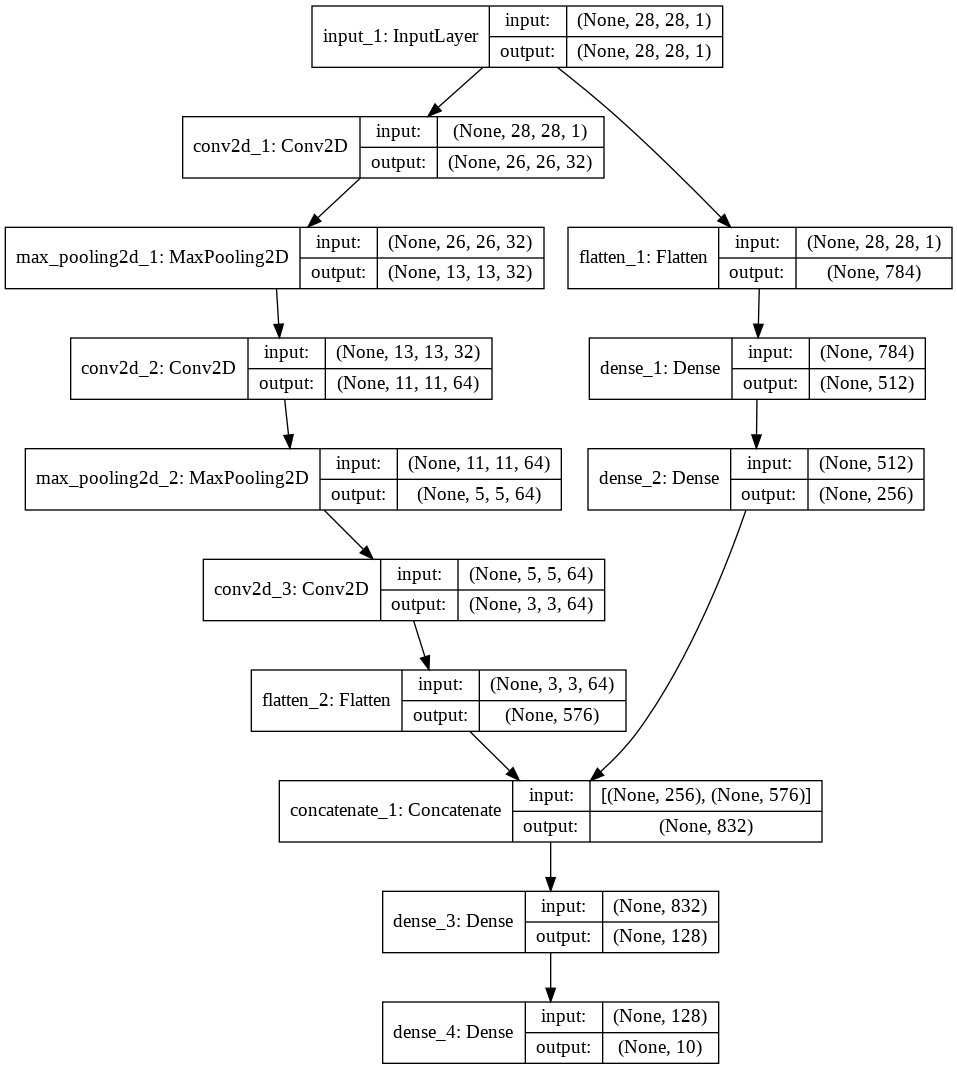

In [56]:
plot_model(model1, to_file='model_multipleBranch.png', show_shapes=True, show_layer_names=True)

### Entrenamiento para MNIST

In [57]:
reset_weights(model1)

tic=time.time()
history_m1_mnist = model1.fit(x=train_mnist,
                              y=train_labels_mnist,
                              validation_split=0.2,
                              epochs=6,
                              shuffle=True,
                              batch_size=128,
                              verbose=2)

print('Tiempo: {} secs'.format(time.time()-tic))

results_m1_mnist = model1.evaluate(test_mnist, test_labels_mnist)
print(results_m1_mnist)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 - 9s - loss: 0.2086 - acc: 0.9342 - val_loss: 0.0696 - val_acc: 0.9799
Epoch 2/6
 - 2s - loss: 0.0522 - acc: 0.9834 - val_loss: 0.0602 - val_acc: 0.9815
Epoch 3/6
 - 2s - loss: 0.0339 - acc: 0.9893 - val_loss: 0.0466 - val_acc: 0.9867
Epoch 4/6
 - 2s - loss: 0.0242 - acc: 0.9925 - val_loss: 0.0672 - val_acc: 0.9834
Epoch 5/6
 - 2s - loss: 0.0188 - acc: 0.9940 - val_loss: 0.0633 - val_acc: 0.9846
Epoch 6/6
 - 2s - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0476 - val_acc: 0.9903
Tiempo: 19.449118614196777 secs
10000/10000 [==============================] - 1s 53us/step
[0.04297584349994722, 0.9899]


In [0]:
# Prediccione para el conjunto de datos de prueba
test_pred_m1_m = model1.predict(test_mnist)

### Entrenamiento para Fashion MNIST

In [59]:
reset_weights(model1)

tic=time.time()
history_m1_fashion_mnist = model1.fit( x=train_fashion_mnist,
                                      y=train_labels_fashion_mnist,
                                      validation_split=0.2,
                                      epochs=6,
                                      shuffle=True,
                                      batch_size=128,
                                      verbose=2)

print('Tiempo: {} secs'.format(time.time()-tic))

results_m1_fashion_mnist = model1.evaluate(test_fashion_mnist, test_labels_fashion_mnist)
print(results_m1_fashion_mnist)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 - 2s - loss: 0.5612 - acc: 0.7936 - val_loss: 0.3810 - val_acc: 0.8599
Epoch 2/6
 - 2s - loss: 0.3463 - acc: 0.8715 - val_loss: 0.3229 - val_acc: 0.8866
Epoch 3/6
 - 2s - loss: 0.2913 - acc: 0.8936 - val_loss: 0.3863 - val_acc: 0.8592
Epoch 4/6
 - 2s - loss: 0.2552 - acc: 0.9060 - val_loss: 0.2919 - val_acc: 0.8938
Epoch 5/6
 - 2s - loss: 0.2341 - acc: 0.9132 - val_loss: 0.2746 - val_acc: 0.9026
Epoch 6/6
 - 2s - loss: 0.2159 - acc: 0.9209 - val_loss: 0.2694 - val_acc: 0.9089
Tiempo: 12.613370418548584 secs
10000/10000 [==============================] - 1s 50us/step
[0.28319897968769076, 0.9039]


In [0]:
# Prediccione para el conjunto de datos de prueba
test_pred_m1_fm = model1.predict(test_fashion_mnist)

## Red neuronal Capas densas

In [0]:
model2 = models.Sequential()
model2.add(Flatten(input_shape=(28, 28, 1)))
model2.add(Dense(units=512,activation='relu'))
model2.add(Dense(units=10, activation='softmax'))

model2.compile( optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [62]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


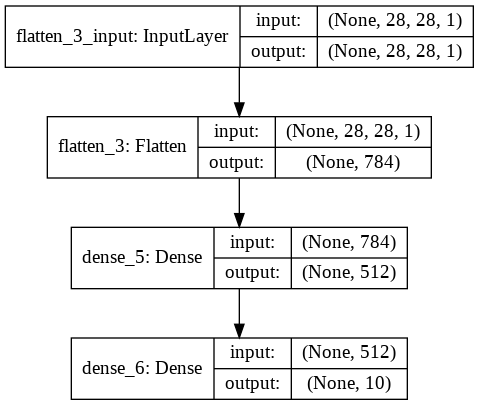

In [63]:
plot_model(model2, show_shapes=True, show_layer_names=True)

### Entrenamiento MNIST

In [64]:
reset_weights(model2)

tic=time.time()
history_m2_mnist = model2.fit(x=train_mnist,
                              y=train_labels_mnist,
                              validation_split=0.2,
                              epochs=6,
                              shuffle=True,
                              batch_size=128,
                              verbose=2)

print('Tiempo: {} secs'.format(time.time()-tic))

results_m2_mnist = model2.evaluate(test_mnist, test_labels_mnist)
print(results_m2_mnist)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 - 1s - loss: 0.2894 - acc: 0.9148 - val_loss: 0.1547 - val_acc: 0.9552
Epoch 2/6
 - 1s - loss: 0.1187 - acc: 0.9655 - val_loss: 0.1035 - val_acc: 0.9693
Epoch 3/6
 - 1s - loss: 0.0781 - acc: 0.9764 - val_loss: 0.0889 - val_acc: 0.9742
Epoch 4/6
 - 1s - loss: 0.0556 - acc: 0.9841 - val_loss: 0.0818 - val_acc: 0.9755
Epoch 5/6
 - 1s - loss: 0.0408 - acc: 0.9881 - val_loss: 0.0821 - val_acc: 0.9753
Epoch 6/6
 - 1s - loss: 0.0305 - acc: 0.9910 - val_loss: 0.0763 - val_acc: 0.9783
Tiempo: 7.448452711105347 secs
10000/10000 [==============================] - 0s 36us/step
[0.06827931904918515, 0.9786]


In [0]:
# Prediccione para el conjunto de datos de prueba
test_pred_m2_m = model2.predict(test_mnist)

### Entrenamiento Fashion MNIST

In [66]:
reset_weights(model2)

tic=time.time()
history_m2_fashion_mnist = model2.fit(x=train_fashion_mnist,
                                      y=train_labels_fashion_mnist,
                                      validation_split=0.2,
                                      epochs=6,
                                      shuffle=True,
                                      batch_size=128,
                                      verbose=2)

print('Tiempo: {} secs'.format(time.time()-tic))

results_m2_fashion_mnist = model2.evaluate(test_fashion_mnist, test_labels_fashion_mnist)
print(results_m2_fashion_mnist)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 - 1s - loss: 0.5832 - acc: 0.7921 - val_loss: 0.4464 - val_acc: 0.8352
Epoch 2/6
 - 1s - loss: 0.3981 - acc: 0.8560 - val_loss: 0.3773 - val_acc: 0.8638
Epoch 3/6
 - 1s - loss: 0.3477 - acc: 0.8715 - val_loss: 0.3374 - val_acc: 0.8794
Epoch 4/6
 - 1s - loss: 0.3206 - acc: 0.8810 - val_loss: 0.3437 - val_acc: 0.8746
Epoch 5/6
 - 1s - loss: 0.2970 - acc: 0.8902 - val_loss: 0.3596 - val_acc: 0.8741
Epoch 6/6
 - 1s - loss: 0.2829 - acc: 0.8957 - val_loss: 0.3189 - val_acc: 0.8858
Tiempo: 7.178821325302124 secs
10000/10000 [==============================] - 0s 38us/step
[0.3492641261100769, 0.8776]


In [0]:
# Prediccione para el conjunto de datos de prueba
test_pred_m2_fm = model2.predict(test_fashion_mnist)

## Red Neuronal Capas Convolucionales

In [0]:
model3 = models.Sequential()
# Capas convolucionales
model3.add(Conv2D(filters=32, 
                  kernel_size=(3, 3), 
                  activation='relu', 
                  input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Capas densas
model3.add(Flatten())
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=10, activation='softmax'))

In [0]:
model3.compile( optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [70]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

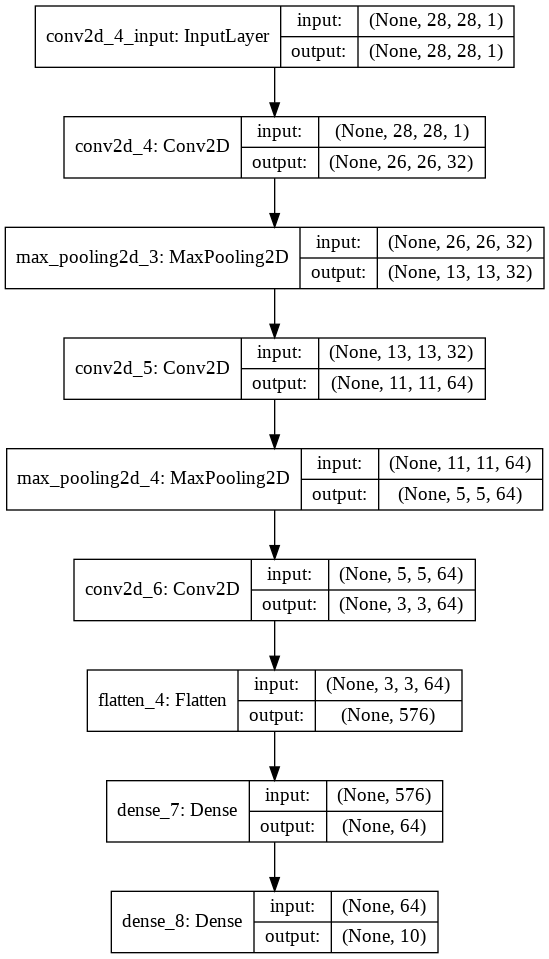

In [71]:
plot_model(model3, to_file='model_multipleBranch.png', show_shapes=True, show_layer_names=True)

### Entrenamiento MNIST

In [72]:
reset_weights(model3)

tic=time.time()
history_m3_mnist = model3.fit(x=train_mnist,
                              y=train_labels_mnist,
                              validation_split=0.2,
                              epochs=6,
                              shuffle=True,
                              batch_size=128,
                              verbose=2)

print('Tiempo: {} secs'.format(time.time()-tic))

results_m3_mnist = model3.evaluate(test_mnist, test_labels_mnist)
print(results_m3_mnist)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 - 2s - loss: 0.2671 - acc: 0.9148 - val_loss: 0.0806 - val_acc: 0.9748
Epoch 2/6
 - 2s - loss: 0.0642 - acc: 0.9808 - val_loss: 0.0966 - val_acc: 0.9708
Epoch 3/6
 - 2s - loss: 0.0426 - acc: 0.9865 - val_loss: 0.0423 - val_acc: 0.9875
Epoch 4/6
 - 2s - loss: 0.0309 - acc: 0.9898 - val_loss: 0.0408 - val_acc: 0.9881
Epoch 5/6
 - 2s - loss: 0.0244 - acc: 0.9923 - val_loss: 0.0416 - val_acc: 0.9887
Epoch 6/6
 - 2s - loss: 0.0196 - acc: 0.9935 - val_loss: 0.0412 - val_acc: 0.9894
Tiempo: 12.029388666152954 secs
10000/10000 [==============================] - 0s 46us/step
[0.030727246954898146, 0.9902]


In [0]:
# Prediccione para el conjunto de datos de prueba
test_pred_m3_m = model3.predict(test_mnist)

### Entrenamiento Fashion MNIST

In [74]:
reset_weights(model3)

tic=time.time()
history_m3_fashion_mnist = model3.fit(x=train_fashion_mnist,
                                      y=train_labels_fashion_mnist,
                                      validation_split=0.2,
                                      epochs=6,
                                      shuffle=True,
                                      batch_size=128,
                                      verbose=2)

print('Tiempo: {} secs'.format(time.time()-tic))

results_m3_fashion_mnist = model3.evaluate(test_fashion_mnist, test_labels_fashion_mnist)
print(results_m3_fashion_mnist)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 - 2s - loss: 0.6970 - acc: 0.7377 - val_loss: 0.4696 - val_acc: 0.8246
Epoch 2/6
 - 2s - loss: 0.4109 - acc: 0.8504 - val_loss: 0.3914 - val_acc: 0.8563
Epoch 3/6
 - 2s - loss: 0.3398 - acc: 0.8749 - val_loss: 0.3487 - val_acc: 0.8702
Epoch 4/6
 - 2s - loss: 0.2987 - acc: 0.8905 - val_loss: 0.3086 - val_acc: 0.8853
Epoch 5/6
 - 2s - loss: 0.2721 - acc: 0.9001 - val_loss: 0.3068 - val_acc: 0.8877
Epoch 6/6
 - 2s - loss: 0.2478 - acc: 0.9088 - val_loss: 0.2745 - val_acc: 0.9003
Tiempo: 11.536674737930298 secs
10000/10000 [==============================] - 0s 46us/step
[0.2896670998096466, 0.8951]


In [0]:
# Prediccione para el conjunto de datos de prueba
test_pred_m3_fm = model3.predict(test_fashion_mnist)

## Resultados y Métricas de los modelos

Funciones para distintos gráficos y cálculo de métricas

In [0]:
def plot_confusion_matrix(test_labels, test_predicted_labels):
    test_true_labels      = np.argmax(test_labels, axis=1)
    test_predicted_labels = np.argmax(test_predicted_labels, axis=1)

    C = confusion_matrix(test_true_labels, test_predicted_labels)

    f, ax = plt.subplots(figsize=(11, 9))
    sns.set()
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(C, cmap=cmap, square=True,
                    annot=True, fmt='d', linewidths=.5)
    ax.set_title('Matriz de Confusión' )
    plt.show()



def plot_loss_metric(history):
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']
    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(12,5))
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
    plt.title('Valor de la función objetivo (loss) en conjuntos de en entrenamiento y validación')
    plt.xlabel('Epocas')
    plt.ylabel('loss')
    plt.legend()

    plt.show()


def plot_accuracy_metric(history):
    acc_values = history.history['acc']
    val_acc_values = history.history['val_acc']
    epochs = range(1, len(acc_values) + 1)

    plt.figure(figsize=(12,5))
    plt.plot(epochs, acc_values, 'b', label='Accuracy')
    plt.plot(epochs, val_acc_values, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()


def print_metrics(results, test_pred, test_labels):
    test_pred = np.argmax(test_pred, axis=1)
    test_labels = np.argmax(test_labels, axis=1)
    print("Accuracy: %.4f" % results[1])
    print("Precision: %.4f" % precision_score(test_pred, test_labels, average='macro'))
    print("Recall: %.4f" % recall_score(test_pred, test_labels, average='macro'))
    print("F1 Score: %.4f" % f1_score(test_pred, test_labels, average='macro'))


### Función de Costo y Accuracy a través de los entrenamientos

#### Dataset MNIST

**MNIST Modelo de dos ramas**

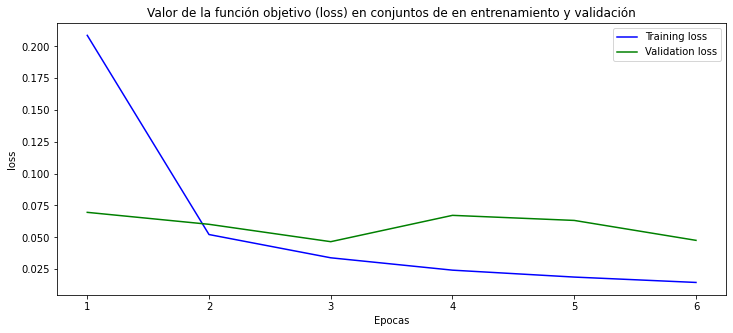

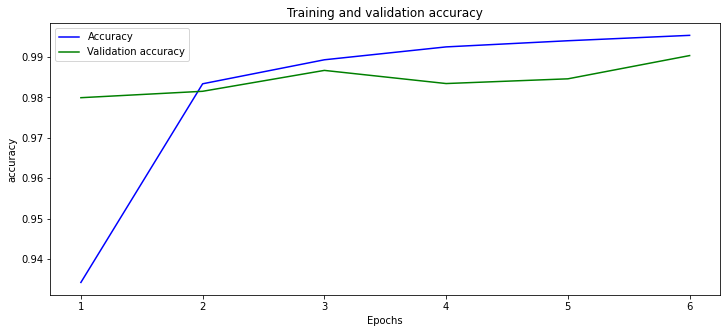

In [77]:
plot_loss_metric(history_m1_mnist)
plot_accuracy_metric(history_m1_mnist)

Aproximadamente a partir en la segunda época la función de costo sobre el conjunto de evaluación alcanza su mínimo, también se observa que en ese mismo punto el accuracy deja de ascender al mismo ritmo y el cruce entre las lineas de accuracy se da alrededor del 98.5% entre la segunda y tercer época por lo que indica que las siguientes épocas y después de ese nivel de accuracy se generan un sobre entrenamiento.

**NNIST Modelo de capas densas**

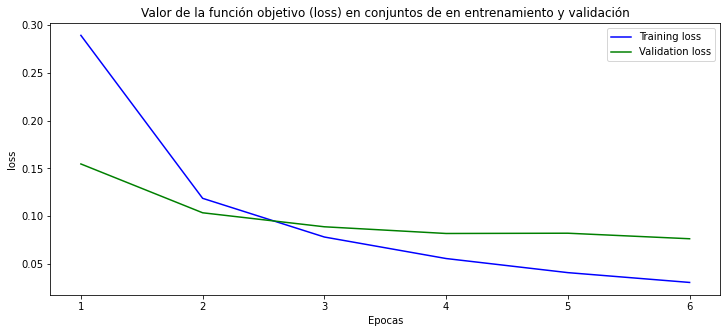

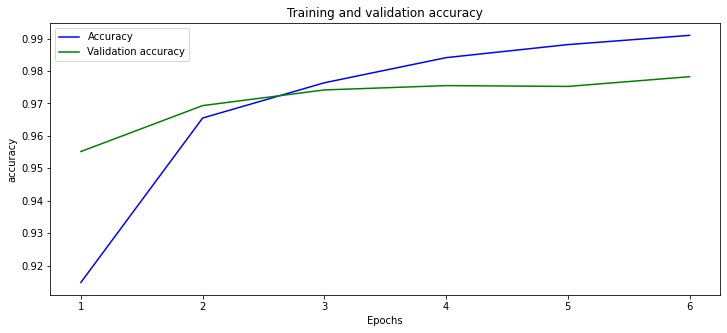

In [78]:
plot_loss_metric(history_m2_mnist)
plot_accuracy_metric(history_m2_mnist)

Aproximadamente a entre la segunda y tercer época  la función de costo sobre el conjunto de evaluación alcanza su mínimo, también se observa que después de la segunda época el accuracy deja de ascender al mismo ritmo y el cruce entre las lineas de accuracy se da alrededor del 97% entre la segunda y tercer época por lo que indica que las siguientes épocas y después de ese nivel de accuracy se generan un sobre entrenamiento.

**NNIST Modelo de capas convolucionales**

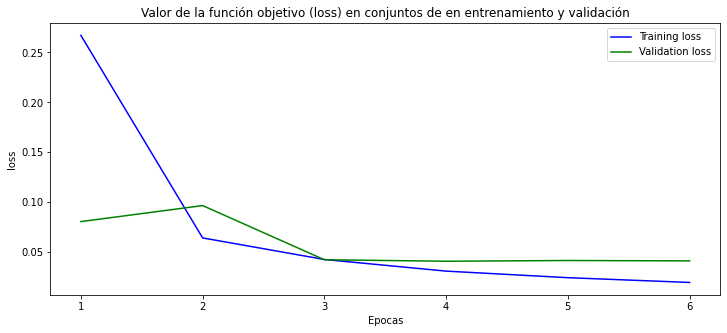

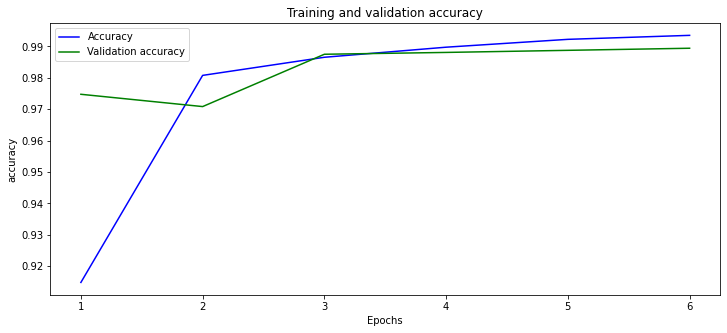

In [79]:
plot_loss_metric(history_m3_mnist)
plot_accuracy_metric(history_m3_mnist)

Aproximadamente a en la segunda época  la función de costo sobre el conjunto de evaluación alcanza su mínimo, también se observa que después de la segunda época el accuracy deja de ascender al mismo ritmo y el cruce entre las lineas de accuracy se da alrededor del 98.5% entre la tercer y cuarta época por lo que indica que las siguientes épocas y después de ese nivel de accuracy se generan un sobre entrenamiento.

#### Dataset Fashion MNIST

**Fashion MNIST Modelo de dos ramas**

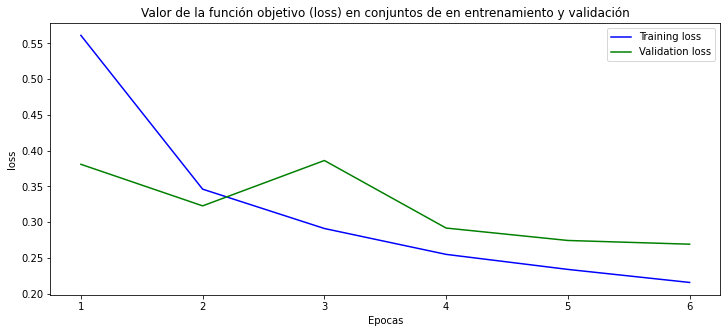

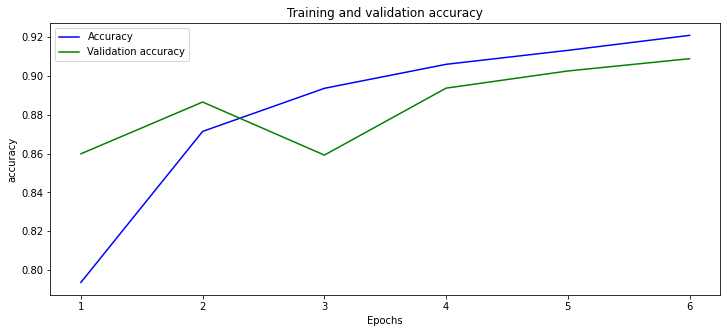

In [80]:
plot_loss_metric(history_m1_fashion_mnist)
plot_accuracy_metric(history_m1_fashion_mnist)

Aproximadamente a partir en la segunda época la función de costo sobre el conjunto de evaluación alcanza su mínimo, también se observa que en ese mismo punto el accuracy deja de ascender al mismo ritmo y el cruce entre las lineas de accuracy se da alrededor del 87% entre la tercer y cuarta época por lo que indica que las siguientes épocas y después de ese nivel de accuracy se generan un sobre entrenamiento.

**Fashion NNIST Modelo de capas densas**

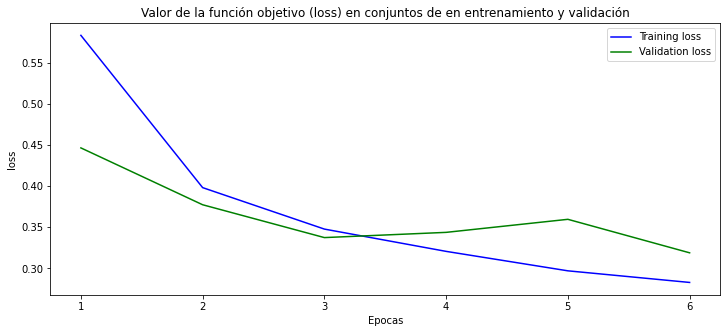

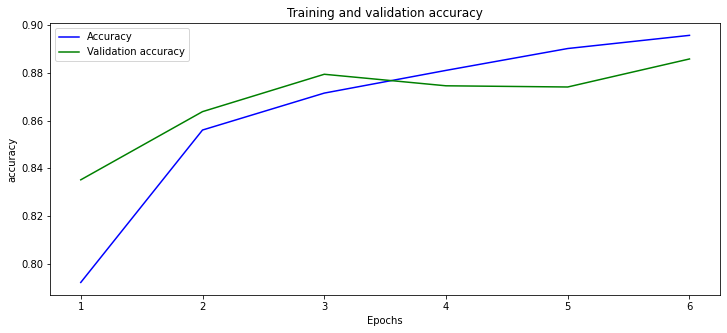

In [81]:
plot_loss_metric(history_m2_fashion_mnist)
plot_accuracy_metric(history_m2_fashion_mnist)

Se observa que a partir de la segunda época ya empieza a existir un sobre ajuste a aproximadamente al alcanzar el 86.5% de accuracy sobre el conjunto de validación.

**Fashion NNIST Modelo de capas convolucionales**

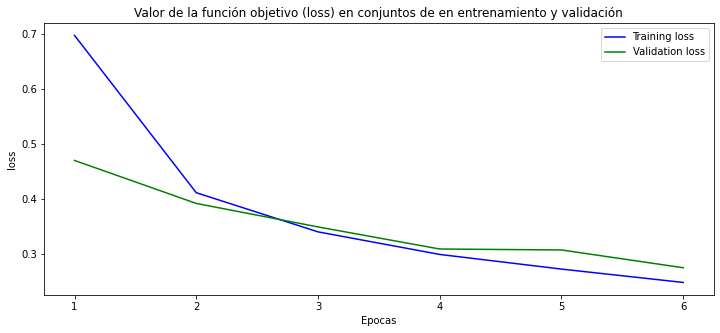

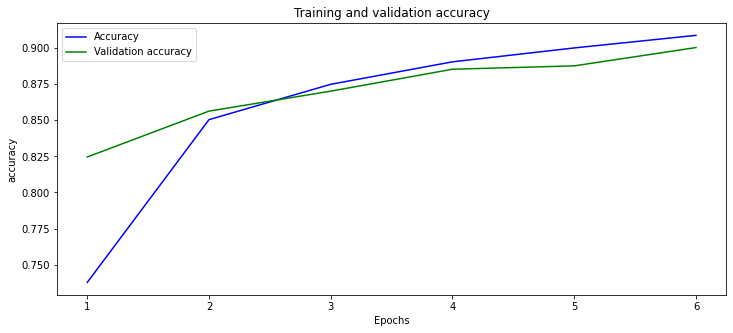

In [82]:
plot_loss_metric(history_m3_fashion_mnist)
plot_accuracy_metric(history_m3_fashion_mnist)

Al igual que los anteriores a partir de la seguna época se empeza a alcanzar un mínimo local de la función de costo, a partir de ahí entre la 3 y cuarta época empieza a haber sobre ajuste al rededor del 86% de accuracy.

### Matrices de confusiones y otras Métricas

**MNIST Modelo con dos ramas**

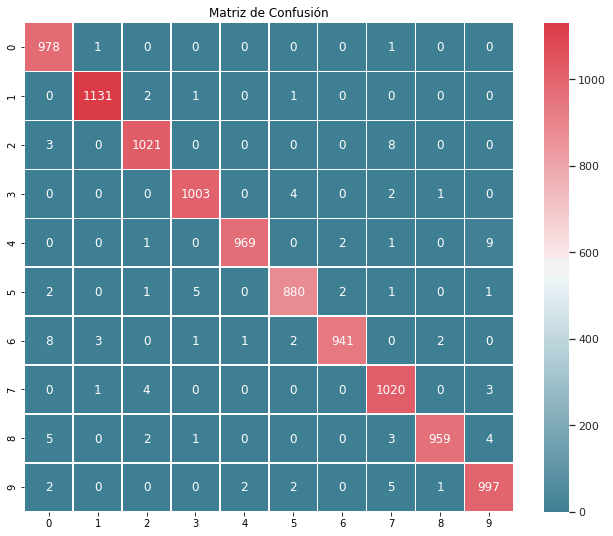

In [83]:
plot_confusion_matrix(test_labels_mnist, test_pred_m1_m)

In [84]:
print_metrics(results_m1_mnist, test_pred_m1_m, test_labels_mnist)

Accuracy: 0.9899
Precision: 0.9897
Recall: 0.9899
F1 Score: 0.9898


**MNIST Modelo de capas densas**

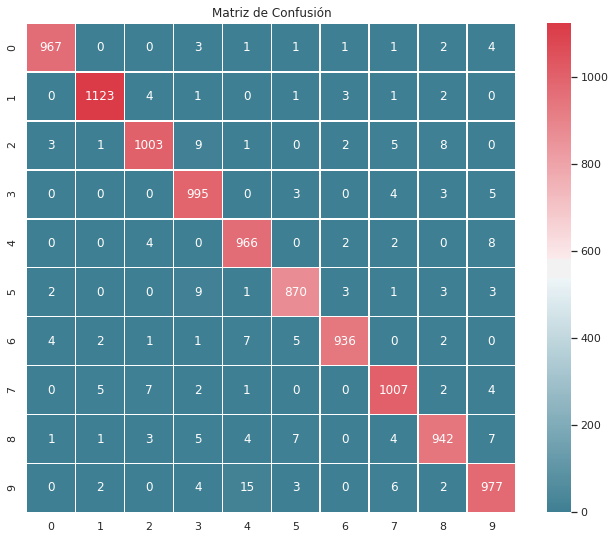

In [85]:
plot_confusion_matrix(test_labels_mnist, test_pred_m2_m)

In [86]:
print_metrics(results_m2_mnist, test_pred_m2_m, test_labels_mnist)

Accuracy: 0.9786
Precision: 0.9784
Recall: 0.9785
F1 Score: 0.9785


**MNIST Modelo de capas convolucionales**

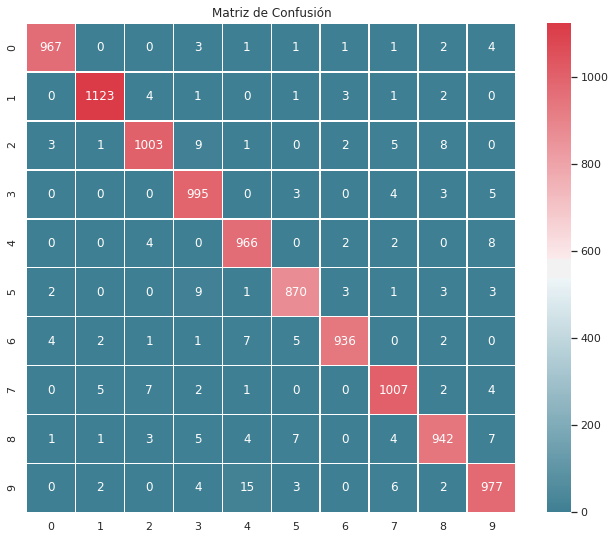

In [87]:
plot_confusion_matrix(test_labels_mnist, test_pred_m2_m)

In [88]:
print_metrics(results_m3_mnist, test_pred_m3_m, test_labels_mnist)

Accuracy: 0.9902
Precision: 0.9902
Recall: 0.9900
F1 Score: 0.9901


#### Conclusiones para el entrenamiento del dataset MNIST

Como se observa en las matrices de confusiones correspondientes a los 3 modelos de entrenamiento generados para el conjunto de datos MNIST los resultados obtenidos son muy parecidos, los 3 rondando en un porcentaje de accuracy sobre el conjunto de validación sobre el 98%.

Sin embargo la red que mejor se comportó a lo largo de las diversas pruebas fue la que solo tiene capas convulocionales alcanzando mayor Accuracy y F1 Score en la mayoría de los casos.

La otra diferencia observada es como se explica en las gráficas de arriba, el modelo de dos ramas necesita menos entrenamiento para aprender los datos (al rededor después de la segunda época) antes de iniciar un sobre ajuste, mientras que el modelo de solo capas densas tarda de 3 a 4 épocas para alcanzar los mismo resultados. La diferencia entre el desempeño entre el modelo de dos ramas y el modelo de de capas convolucionales es muy similar, sin haber diferencias significativas que justifiquen agregar (para este caso) muchas más capas y por tanto más variables por entrenar.

**Fashion MNIST Modelo con dos ramas**

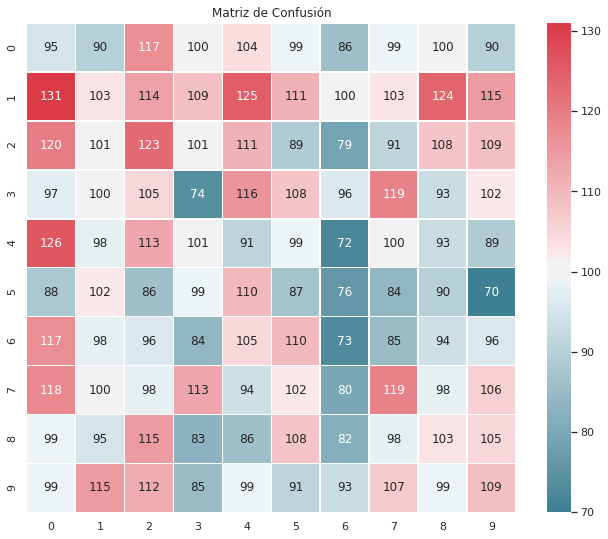

In [89]:
plot_confusion_matrix(test_labels_mnist, test_pred_m1_fm)

In [90]:
print_metrics(results_m1_fashion_mnist, test_pred_m1_fm, test_labels_fashion_mnist)

Accuracy: 0.9039
Precision: 0.9039
Recall: 0.9037
F1 Score: 0.9029


**Fashion MNIST Modelo de capas densas**

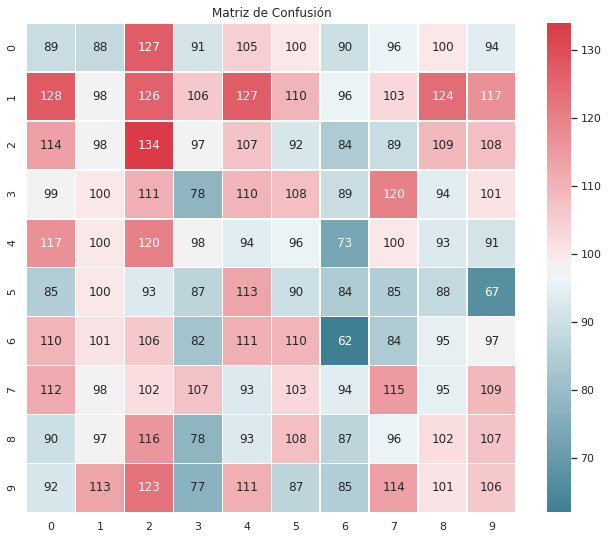

In [91]:
plot_confusion_matrix(test_labels_mnist, test_pred_m2_fm)

In [92]:
print_metrics(results_m2_fashion_mnist, test_pred_m2_fm, test_labels_fashion_mnist)

Accuracy: 0.8776
Precision: 0.8776
Recall: 0.8795
F1 Score: 0.8773


**Fashion MNIST Modelo de capas convolucionales**

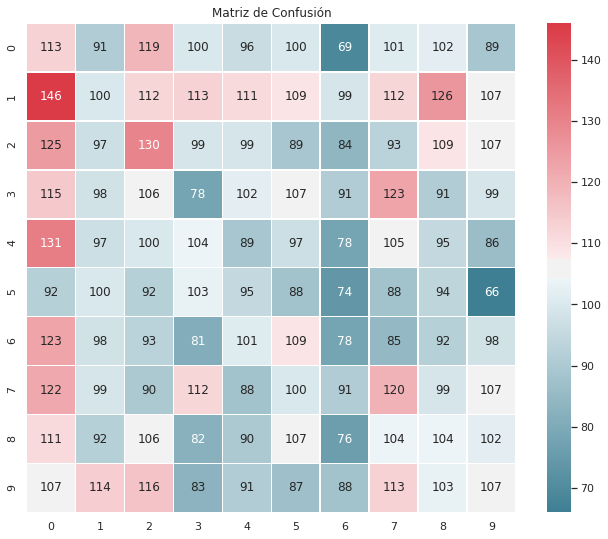

In [93]:
plot_confusion_matrix(test_labels_mnist, test_pred_m3_fm)

In [94]:
print_metrics(results_m3_fashion_mnist, test_pred_m3_fm, test_labels_fashion_mnist)

Accuracy: 0.8951
Precision: 0.8951
Recall: 0.8953
F1 Score: 0.8937


#### Conclusiones para el entrenamiento del dataset Fashion MNIST

Para el dataset de Fasion MNIST las clasificación rondó entre el 87% a 90% de accuracy esta vez el modelo que se comportó mejor fué el que tiene las dos ramas, superando por una décima al modelo de solo capas convolucionales, alcanzado en todas sus métricas hasta el 90%.

Observando las matrices de confusión del modelo de capas convolucionales vs el modelo de dos ramas pudiera parecer que el modelo de capas convolucionales fue el que menos se equivocó puesto que no tiene tantas casillas rojas, sin embargo, lo que sucede es que sus equivocaciones estan más distribuidas es decir no fué tan consistente con sus equivocaciones algo que ocurre mejor con el modelo de dos capas además de que obtuvo una *recall* y *precision* más altos.

En cuanto al desempeño la mejor fue el modelo de dos capas, el accuracy sobre el conjunto de entrenamiento llegó a su máximo local muy cerca de la segunda época al rededor del 88% mientras que los otros dos modelos tardaron un poco más en llegar con un pico de accuracy más bajo antes de que empezara a haber sobre entrenamiento. En este caso el agregar las otras dos capas para realizar por un lado un proceso de convolución con diversos filtros y en cada capa aprender mejor características más generales junto con la rama de capas densas funcióno mucho mejor que solo la capa convolucional aunque el costo fue pasar  de 83,322 parámetros entrenables a 696,906, cantidad bastante similar a el modelo de una solo capas densas.

